In [1]:
from lacbox.io import load_pc, save_pc
from lacbox.test import test_data_path
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
import matplotlib

# matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use('science')

# # Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'


pc_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_pc.dat'
pc_data = load_pc(pc_path)
# print(f"Number of profiles: len(pc_data)={len(pc_data)}")
# print(f"Profile keys: pc_data[i].keys()={pc_data[0].keys()}")


# Removing last 3 profile elements (60% + 100%)
pc_data = pc_data[:-3]

# Interpolating for a new aoa grid (very course)
aoa_deg_new = np.linspace(0, 20, 40)
for iprof, prof in enumerate(pc_data):
    pc_data[iprof]["cl"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cl"])
    pc_data[iprof]["cd"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cd"])
    pc_data[iprof]["cm"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cm"])
    pc_data[iprof]["aoa_deg"] = aoa_deg_new

# Function to Find Maximum and Design Point

In [1]:
def find_max_and_design_of_pc(data, thumb_subtract = 0.4):
    """
    Find the CL_max and the CD and AoA that correspond to that.
    Also find the CL_design (=max-0.4), as well as the corresponding CD and AoA.

    Input:
    -------------
        data:   pc_data[i]
    """
    # Find the maximum values
    cl_max_idx = np.argmax(data['cl'])
    cl_max = data['cl'][cl_max_idx]
    cd_for_max = data['cd'][cl_max_idx]
    aoa_for_max = data['aoa_deg'][cl_max_idx]

    # Find the design values
    cl_des_idx = np.argmin(np.abs(data['cl'] - (cl_max - thumb_subtract)))
    cl_des = data['cl'][cl_des_idx]
    cd_for_des = data['cd'][cl_des_idx]
    aoa_for_des = data['aoa_deg'][cl_des_idx]

    point_max = {
        'cl': cl_max,
        'cd': cd_for_max, 
        'aoa': aoa_for_max,
    }

    point_des ={
        'cl': cl_des, 
        'cd': cd_for_des, 
        'aoa': aoa_for_des
    }

    return point_max, point_des

# Visualize the data

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/cl_vs_cd_24.1.pdf'

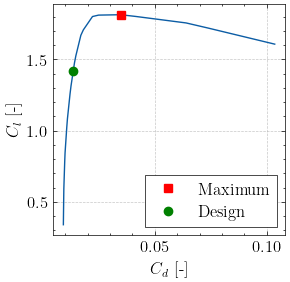

In [3]:
# List to store all rows
all_rows = []

thumb_subtract_list = [0.4, 0.4, 0.55]

# Plotting interpolated data
for iprof, prof in enumerate(pc_data):

    # Find Max and Design
    point_max, point_des = find_max_and_design_of_pc(pc_data[iprof],thumb_subtract=thumb_subtract_list[iprof])
    tc = pc_data[iprof]['tc']

    # Collect the data in a row
    row = [
        tc,
        point_max['cl'],          # Max CL
        point_max['cd'],          # Max CD
        point_max['cl']/point_max['cd'],
        point_max['aoa'],         # Max AOA
        point_des['cl'],          # Design CL
        point_des['cd'],          # Design CD
        point_des['cl']/point_des['cd'],
        point_des['aoa']          # Design AOA
    ]
    all_rows.append(row)

    # CL VS CD
    figure = plt.figure(figsize=(3, 3))
    plt.plot(prof["cd"], prof["cl"])
    plt.plot(point_max['cd'], point_max['cl'], 'rs', label='Maximum')
    plt.plot(point_des['cd'], point_des['cl'], 'go', label='Design')
    plt.xlabel(r"$C_d$ [-]")
    plt.ylabel(r"$C_l$ [-]")
    legend = plt.legend(fancybox=False, edgecolor="black")
    legend.get_frame().set_linewidth(0.5)    
    plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
    plt.savefig(f'Plots/cl_vs_cd_{tc}.pdf', dpi=300, bbox_inches='tight')

    # CL VS AoA
    figure = plt.figure(figsize=(3, 3))
    plt.plot(prof["aoa_deg"], prof["cl"])
    plt.plot(point_max['aoa'], point_max['cl'], 'rs', label='Maximum')
    plt.plot(point_des['aoa'], point_des['cl'], 'go', label='Design')
    plt.xlabel(r"$\alpha$ [deg]")
    plt.ylabel(r"$C_l$ [-]")
    plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
    plt.savefig(f'Plots/cl_vs_aoa_{tc}.pdf', dpi=300, bbox_inches='tight')

    # CL VS CL/CD
    figure = plt.figure(figsize=(3, 3))
    plt.plot(prof["cl"]/prof["cd"], prof["cl"])
    plt.plot(point_max['cl']/point_max['cd'], point_max['cl'], 'rs', label='Maximum')
    plt.plot(point_des['cl']/point_des['cd'], point_des['cl'], 'go', label='Design')
    plt.xlabel(r"$C_l/C_d$ [-]")
    plt.ylabel(r"$C_l$ [-]")
    plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
    plt.savefig(f'Plots/cl_vs_cl_cd_{tc}.pdf', dpi=300, bbox_inches='tight')

# Only for 40%

In [ ]:
pc_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_pc.dat'
pc_data = load_pc(pc_path)


# Only 40%
prof = pc_data[3]

# Interpolating for a new aoa grid (very course)
aoa_deg_new = np.linspace(0, 12, 40)
prof["cl"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cl"])
prof["cd"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cd"])
prof["cm"] = np.interp(aoa_deg_new, prof["aoa_deg"], prof["cm"])
prof["aoa_deg"] = aoa_deg_new



# Find Max and Design
point_max, point_des = find_max_and_design_of_pc(prof)
tc = prof['tc']

# Collect the data in a row
row = [
    tc,
    point_max['cl'],          # Max CL
    point_max['cd'],          # Max CD
    point_max['cl']/point_max['cd'],
    point_max['aoa'],         # Max AOA
    point_des['cl'],          # Design CL
    point_des['cd'],          # Design CD
    point_des['cl']/point_des['cd'],
    point_des['aoa']          # Design AOA
]
all_rows.append(row)

# CL VS CD
figure = plt.figure(figsize=(3, 3))
plt.plot(prof["cd"], prof["cl"])
plt.plot(point_max['cd'], point_max['cl'], 'rs', label='Maximum')
plt.plot(point_des['cd'], point_des['cl'], 'go', label='Design')

# plt.plot(point_des['cd'], point_des['cl'], 'go', label='Design')
plt.xlabel(r"$C_d$ [-]")
plt.ylabel(r"$C_l$ [-]")
legend = plt.legend(fancybox=False, edgecolor="black", loc='lower right')
legend.get_frame().set_linewidth(0.5)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'Plots/cl_vs_cd_{tc}.pdf', dpi=300, bbox_inches='tight')

# CL VS AoA
figure = plt.figure(figsize=(3, 3))
plt.plot(prof["aoa_deg"], prof["cl"])
plt.plot(point_max['aoa'], point_max['cl'], 'rs', label='Maximum')
plt.plot(point_des['aoa'], point_des['cl'], 'go', label='Design')
plt.xlabel(r"$\alpha$ [deg]")
plt.ylabel(r"$C_l$ [-]")
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'Plots/cl_vs_aoa_{tc}.pdf', dpi=300, bbox_inches='tight')

# CL VS CL/CD
figure = plt.figure(figsize=(3, 3))
plt.plot(prof["cl"]/prof["cd"], prof["cl"])
plt.plot(point_max['cl']/point_max['cd'], point_max['cl'], 'rs', label='Maximum')
plt.plot(point_des['cl']/point_des['cd'], point_des['cl'], 'go', label='Design')
plt.xlabel(r"$C_l/C_d$ [-]")
plt.ylabel(r"$C_l$ [-]")
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major') 
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'Plots/cl_vs_cl_cd_{tc}.pdf', dpi=300, bbox_inches='tight')

# print(point_des['cl'], point_des['cd'], point_des['cl']/point_des['cd'], point_des['aoa'])


# Save CSV

In [ ]:
import csv

# THIS IS NOT SAVING THE TC = 0.48. HAVE TO DO IT MANUALLY

# Add the custom header row as the first row
header_row = [
    't/c',
    'cl_max', 'cd_for_max', 'cl/cd_max', 'aoa_for_max',
    'cl_des', 'cd_for_des', 'cl/cd_des', 'aoa_for_des'
]

# After the loop, write all the collected data to a file
with open('polar_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(header_row)
    
    # Write all collected rows
    writer.writerows(all_rows)